# 📝 NLP Learning Series - Notebook 01: Text Preprocessing Fundamentals

**Author:** NLP Mastery Series  
**Date:** September 2025  
**Description:** Complete guide to text preprocessing for NLP tasks

---

## 🎯 Learning Objectives

By the end of this notebook, you will:
- Clean and normalize text data effectively
- Apply various tokenization techniques
- Handle stopwords and stemming/lemmatization
- Build a complete preprocessing pipeline
- Visualize preprocessing effects

## 🛠️ What We'll Build
- Custom `TextPreprocessor` class
- Text statistics analyzer
- Word frequency visualizations

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
from collections import Counter
from wordcloud import WordCloud

# Download required NLTK data
nltk.download('punkt', quiet=True)
nltk.download('stopwords', quiet=True)
nltk.download('wordnet', quiet=True)
nltk.download('omw-1.4', quiet=True)

from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer

# Set up plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette('husl')

print("✅ All libraries imported successfully!")

✅ All libraries imported successfully!


## 1️⃣ Sample Data Setup

Let's start with sample texts that represent common NLP challenges.

In [2]:
# Sample text data for demonstration
sample_texts = [
    "Hello World! This is a great day for learning NLP. 😊",
    "Machine Learning and Deep Learning are transforming AI!!!",
    "Natural Language Processing helps computers understand human language.",
    "Data Science involves statistics, programming, and domain expertise.",
    "Python is an excellent programming language for AI development."
]

# Create DataFrame
df = pd.DataFrame({'text': sample_texts})
print("📊 Sample Dataset:")
print(df)

# Basic statistics
df['char_count'] = df['text'].str.len()
df['word_count'] = df['text'].str.split().str.len()
print("\n📈 Text Statistics:")
print(df[['char_count', 'word_count']].describe())

📊 Sample Dataset:
                                                text
0  Hello World! This is a great day for learning ...
1  Machine Learning and Deep Learning are transfo...
2  Natural Language Processing helps computers un...
3  Data Science involves statistics, programming,...
4  Python is an excellent programming language fo...

📈 Text Statistics:
       char_count  word_count
count    5.000000     5.00000
mean    62.000000     8.80000
std      7.516648     1.30384
min     52.000000     8.00000
25%     57.000000     8.00000
50%     63.000000     8.00000
75%     68.000000     9.00000
max     70.000000    11.00000


## 2️⃣ Basic Text Cleaning

Essential cleaning operations for most NLP tasks.

In [3]:
def basic_text_cleaning(text):
    """
    Basic text cleaning pipeline
    
    Args:
        text (str): Input text
    Returns:
        str: Cleaned text
    """
    # Convert to lowercase
    text = text.lower()
    
    # Remove URLs and emails
    text = re.sub(r'http\S+|www\.\S+|\S+@\S+', '', text)
    
    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()
    
    return text

# Apply cleaning
df['cleaned_text'] = df['text'].apply(basic_text_cleaning)

print("🧹 Cleaning Results:")
for i, (orig, clean) in enumerate(zip(df['text'], df['cleaned_text'])):
    print(f"\nText {i+1}:")
    print(f"  Original: {orig}")
    print(f"  Cleaned:  {clean}")

🧹 Cleaning Results:

Text 1:
  Original: Hello World! This is a great day for learning NLP. 😊
  Cleaned:  hello world! this is a great day for learning nlp. 😊

Text 2:
  Original: Machine Learning and Deep Learning are transforming AI!!!
  Cleaned:  machine learning and deep learning are transforming ai!!!

Text 3:
  Original: Natural Language Processing helps computers understand human language.
  Cleaned:  natural language processing helps computers understand human language.

Text 4:
  Original: Data Science involves statistics, programming, and domain expertise.
  Cleaned:  data science involves statistics, programming, and domain expertise.

Text 5:
  Original: Python is an excellent programming language for AI development.
  Cleaned:  python is an excellent programming language for ai development.


## 3️⃣ Advanced Text Cleaning

In [4]:
def advanced_text_cleaning(text):
    """
    Advanced text cleaning with punctuation and number removal
    """
    # Remove punctuation and special characters
    text = re.sub(r'[^\w\s]', '', text)
    
    # Remove numbers (optional)
    text = re.sub(r'\d+', '', text)
    
    # Clean extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()
    
    return text

# Apply advanced cleaning
df['advanced_cleaned'] = df['cleaned_text'].apply(advanced_text_cleaning)

print("🔧 Advanced Cleaning:")
for i, (clean, advanced) in enumerate(zip(df['cleaned_text'], df['advanced_cleaned'])):
    print(f"\nText {i+1}:")
    print(f"  Basic:    {clean}")
    print(f"  Advanced: {advanced}")

🔧 Advanced Cleaning:

Text 1:
  Basic:    hello world! this is a great day for learning nlp. 😊
  Advanced: hello world this is a great day for learning nlp

Text 2:
  Basic:    machine learning and deep learning are transforming ai!!!
  Advanced: machine learning and deep learning are transforming ai

Text 3:
  Basic:    natural language processing helps computers understand human language.
  Advanced: natural language processing helps computers understand human language

Text 4:
  Basic:    data science involves statistics, programming, and domain expertise.
  Advanced: data science involves statistics programming and domain expertise

Text 5:
  Basic:    python is an excellent programming language for ai development.
  Advanced: python is an excellent programming language for ai development


## 4️⃣ Tokenization

### word_tokenizer vs sentence_tokenizer in NLTK

- **sentence_tokenizer** (e.g., `sent_tokenize`): Splits text into sentences based on punctuation and capitalization patterns.


- **word_tokenizer** (e.g., `word_tokenize`): Splits sentences into individual words and punctuation as separate tokens.


In [ ]:
# punkt_tab is the NLTK data package containing safe, tabular models for the Punkt sentence tokenizer (language-specific abbreviations, collocations, and sentence starters) used to split text into sentences.
nltk.download('punkt_tab')

# Demonstrate different tokenization methods
sample_text = "Natural Language Processing helps computers understand human language."

print(f"Original: {sample_text}")
print("\n🔤 Tokenization Results:")

# NLTK word tokenization
word_tokens = word_tokenize(sample_text.lower())
print(f"Word tokens: {word_tokens}")

# Sentence tokenization
sent_tokens = sent_tokenize(sample_text)
print(f"Sentences: {sent_tokens}")

# Simple split comparison
simple_tokens = sample_text.lower().split()
print(f"Simple split: {simple_tokens}")

# Compare results
print(f"\n📊 Token count comparison:")
print(f"NLTK: {len(word_tokens)}, Simple: {len(simple_tokens)}")

Original: Natural Language Processing helps computers understand human language.

🔤 Tokenization Results:
Word tokens: ['natural', 'language', 'processing', 'helps', 'computers', 'understand', 'human', 'language', '.']
Sentences: ['Natural Language Processing helps computers understand human language.']
Simple split: ['natural', 'language', 'processing', 'helps', 'computers', 'understand', 'human', 'language.']

📊 Token count comparison:
NLTK: 9, Simple: 8


[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/rahulgarg/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


## 5️⃣ Stopword Removal

📚 English stopwords (first 20): ['most', 'now', 'having', 'between', 'him', "you've", "he's", 'was', 'my', "we'll", 'all', "mustn't", "she's", "shouldn't", 'if', 'an', "they're", 'doesn', 'these', "isn't"]
Total stopwords: 198

🚫 Stopword Removal Results:
Original (9): ['natural', 'language', 'processing', 'helps', 'computers', 'understand', 'human', 'language', '.']
Filtered (9): ['natural', 'language', 'processing', 'helps', 'computers', 'understand', 'human', 'language', '.']
Removed: set()


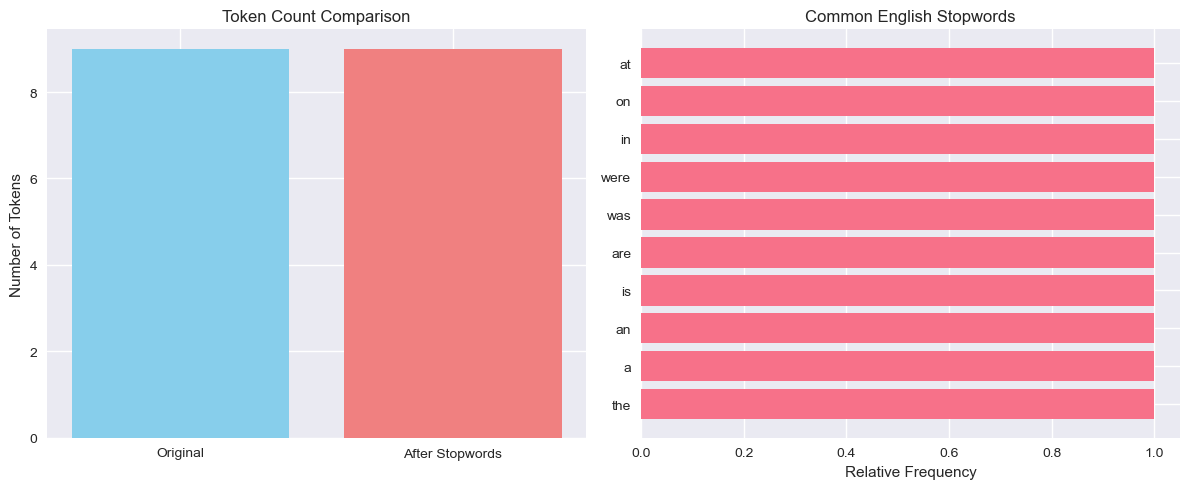

In [6]:
# Stopword removal demonstration
stop_words = set(stopwords.words('english'))

print(f"📚 English stopwords (first 20): {list(stop_words)[:20]}")
print(f"Total stopwords: {len(stop_words)}")

# Remove stopwords from tokens
filtered_tokens = [token for token in word_tokens if token not in stop_words]

print(f"\n🚫 Stopword Removal Results:")
print(f"Original ({len(word_tokens)}): {word_tokens}")
print(f"Filtered ({len(filtered_tokens)}): {filtered_tokens}")

# Show removed stopwords
removed = set(word_tokens) - set(filtered_tokens)
print(f"Removed: {removed}")

# Visualize impact
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Token count comparison
ax[0].bar(['Original', 'After Stopwords'], [len(word_tokens), len(filtered_tokens)], 
         color=['skyblue', 'lightcoral'])
ax[0].set_title('Token Count Comparison')
ax[0].set_ylabel('Number of Tokens')

# Top stopwords frequency (simulated)
common_stops = ['the', 'a', 'an', 'is', 'are', 'was', 'were', 'in', 'on', 'at']
ax[1].barh(common_stops, [1]*len(common_stops))
ax[1].set_title('Common English Stopwords')
ax[1].set_xlabel('Relative Frequency')

plt.tight_layout()
plt.show()

## 6️⃣ Stemming vs Lemmatization

### PorterStemmer vs WordNetLemmatizer in NLTK

- **PorterStemmer**: A rule-based stemming algorithm that trims suffixes to reduce a word to its stem or root form. It is fast but sometimes produces non-words or stems that are not linguistically valid.


- **WordNetLemmatizer**: Uses lexical knowledge from the WordNet database to reduce words to their meaningful base form (lemma). It considers the part of speech and context, producing valid dictionary words but is slower than stemming.


### Summary:
- PorterStemmer is faster but may output invalid stems.
- WordNetLemmatizer is slower but produces linguistically valid lemmas, especially when POS tags are provided.

In [7]:
# Compare stemming and lemmatization
words = ['running', 'ran', 'runs', 'easily', 'fairly', 'better', 'best', 'flying']

# Initialize tools
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

print("🔍 Stemming vs Lemmatization Comparison:")
print(f"{'Word':<12} {'Stemmed':<12} {'Lemmatized':<12}")
print("-" * 40)

results = []
for word in words:
    stemmed = stemmer.stem(word)
    lemmatized = lemmatizer.lemmatize(word, pos='v')
    print(f"{word:<12} {stemmed:<12} {lemmatized:<12}")
    results.append({'word': word, 'stemmed': stemmed, 'lemmatized': lemmatized})

# Create comparison DataFrame
comparison_df = pd.DataFrame(results)
print("\n📊 Results Summary:")
print(comparison_df)

🔍 Stemming vs Lemmatization Comparison:
Word         Stemmed      Lemmatized  
----------------------------------------
running      run          run         
ran          ran          run         
runs         run          run         
easily       easili       easily      
fairly       fairli       fairly      
better       better       better      
best         best         best        
flying       fli          fly         

📊 Results Summary:
      word stemmed lemmatized
0  running     run        run
1      ran     ran        run
2     runs     run        run
3   easily  easili     easily
4   fairly  fairli     fairly
5   better  better     better
6     best    best       best
7   flying     fli        fly


## 7️⃣ Complete Preprocessing Pipeline

In [8]:
class TextPreprocessor:
    """
    Comprehensive text preprocessing pipeline
    """
    
    def __init__(self, remove_stopwords=True, use_lemmatization=True, 
                 remove_punctuation=True, lowercase=True):
        self.remove_stopwords = remove_stopwords
        self.use_lemmatization = use_lemmatization
        self.remove_punctuation = remove_punctuation
        self.lowercase = lowercase
        
        # Initialize tools
        self.stop_words = set(stopwords.words('english'))
        self.lemmatizer = WordNetLemmatizer()
        self.stemmer = PorterStemmer()
    
    def clean_text(self, text):
        """Basic text cleaning"""
        if self.lowercase:
            text = text.lower()
        
        # Remove URLs and emails
        text = re.sub(r'http\S+|www\.\S+|\S+@\S+', '', text)
        
        if self.remove_punctuation:
            text = re.sub(r'[^\w\s]', '', text)
        
        # Clean whitespace
        text = re.sub(r'\s+', ' ', text).strip()
        return text
    
    def preprocess(self, text):
        """Complete preprocessing pipeline"""
        # Clean text
        text = self.clean_text(text)
        
        # Tokenize
        tokens = word_tokenize(text)
        
        # Remove stopwords
        if self.remove_stopwords:
            tokens = [token for token in tokens if token not in self.stop_words]
        
        # Lemmatize or stem
        if self.use_lemmatization:
            tokens = [self.lemmatizer.lemmatize(token) for token in tokens]
        else:
            tokens = [self.stemmer.stem(token) for token in tokens]
        
        return tokens
    
    def preprocess_batch(self, texts):
        """Process multiple texts"""
        return [self.preprocess(text) for text in texts]

# Test the pipeline
preprocessor = TextPreprocessor()

print("🔄 Complete Preprocessing Pipeline:")
for i, text in enumerate(sample_texts[:3]):
    processed = preprocessor.preprocess(text)
    print(f"\nText {i+1}:")
    print(f"  Original:  {text}")
    print(f"  Processed: {processed}")

🔄 Complete Preprocessing Pipeline:

Text 1:
  Original:  Hello World! This is a great day for learning NLP. 😊
  Processed: ['hello', 'world', 'great', 'day', 'learning', 'nlp']

Text 2:
  Original:  Machine Learning and Deep Learning are transforming AI!!!
  Processed: ['machine', 'learning', 'deep', 'learning', 'transforming', 'ai']

Text 3:
  Original:  Natural Language Processing helps computers understand human language.
  Processed: ['natural', 'language', 'processing', 'help', 'computer', 'understand', 'human', 'language']


## 8️⃣ Text Analysis and Visualization

📊 Preprocessing Impact:
Original words: 54
Processed words: 33
Reduction: 21 words
Original vocabulary: 38
Processed vocabulary: 27


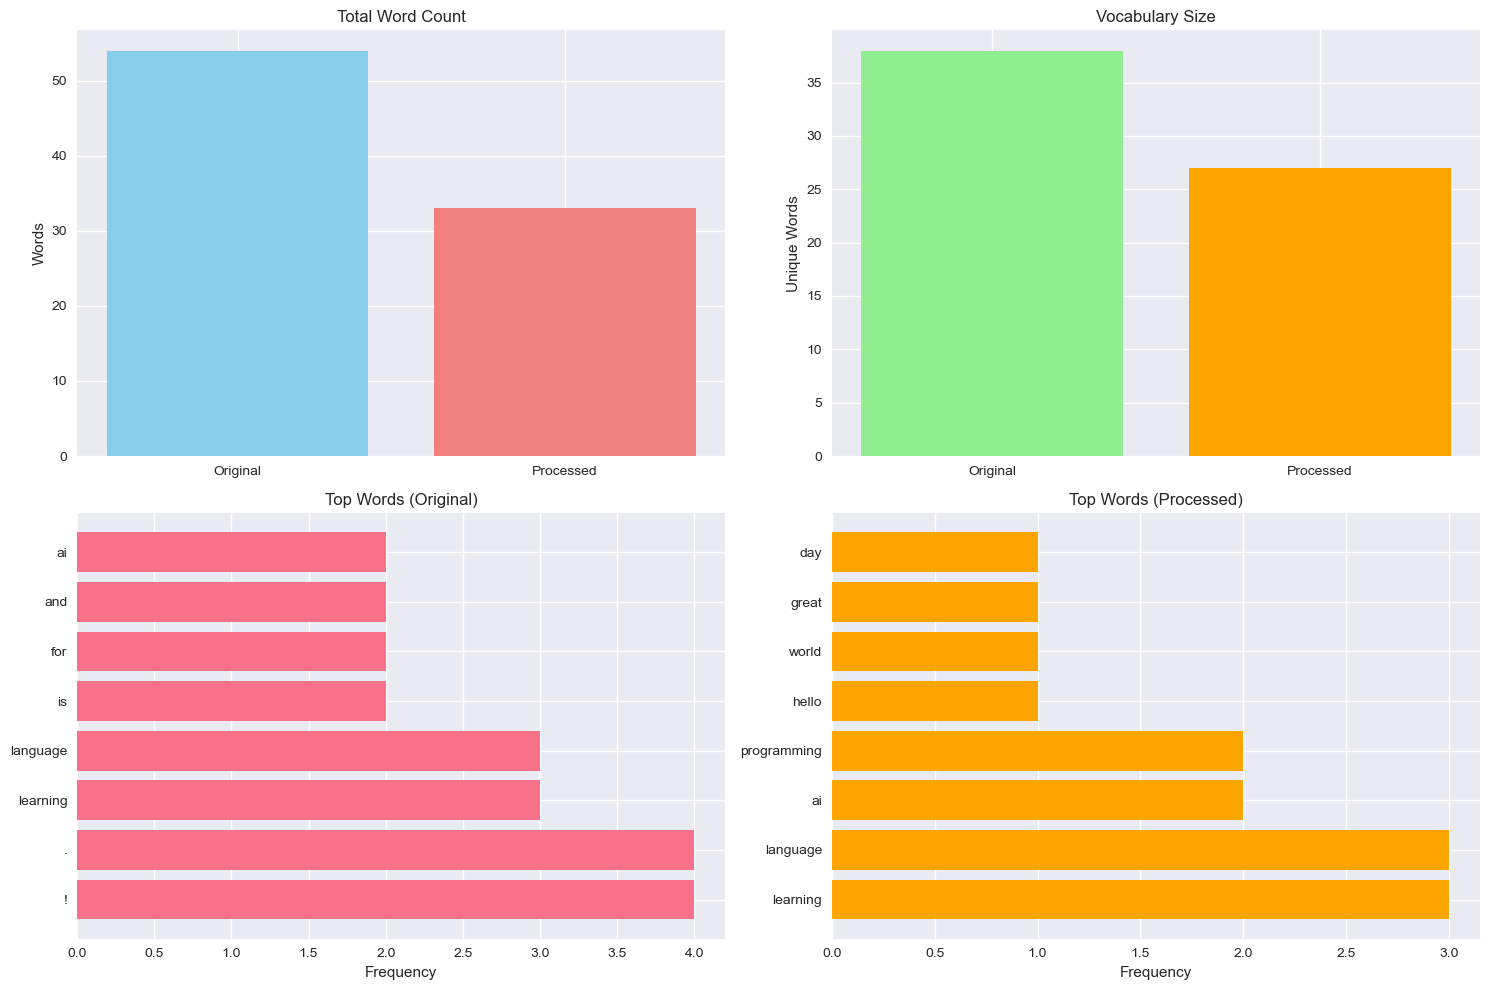

In [9]:
# Analyze preprocessing effects
all_processed = preprocessor.preprocess_batch(sample_texts)

# Collect all words
original_words = []
processed_words = []

for i, text in enumerate(sample_texts):
    original_words.extend(word_tokenize(text.lower()))
    processed_words.extend(all_processed[i])

print("📊 Preprocessing Impact:")
print(f"Original words: {len(original_words)}")
print(f"Processed words: {len(processed_words)}")
print(f"Reduction: {len(original_words) - len(processed_words)} words")
print(f"Original vocabulary: {len(set(original_words))}")
print(f"Processed vocabulary: {len(set(processed_words))}")

# Word frequency analysis
original_freq = Counter(original_words).most_common(10)
processed_freq = Counter(processed_words).most_common(10)

# Visualization
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))

# 1. Word count comparison
ax1.bar(['Original', 'Processed'], [len(original_words), len(processed_words)], 
       color=['skyblue', 'lightcoral'])
ax1.set_title('Total Word Count')
ax1.set_ylabel('Words')

# 2. Vocabulary size comparison
ax2.bar(['Original', 'Processed'], [len(set(original_words)), len(set(processed_words))], 
       color=['lightgreen', 'orange'])
ax2.set_title('Vocabulary Size')
ax2.set_ylabel('Unique Words')

# 3. Top words (original)
if original_freq:
    words, counts = zip(*original_freq[:8])
    ax3.barh(words, counts)
    ax3.set_title('Top Words (Original)')
    ax3.set_xlabel('Frequency')

# 4. Top words (processed)
if processed_freq:
    words, counts = zip(*processed_freq[:8])
    ax4.barh(words, counts, color='orange')
    ax4.set_title('Top Words (Processed)')
    ax4.set_xlabel('Frequency')

plt.tight_layout()
plt.show()

## 9️⃣ Word Cloud Visualization

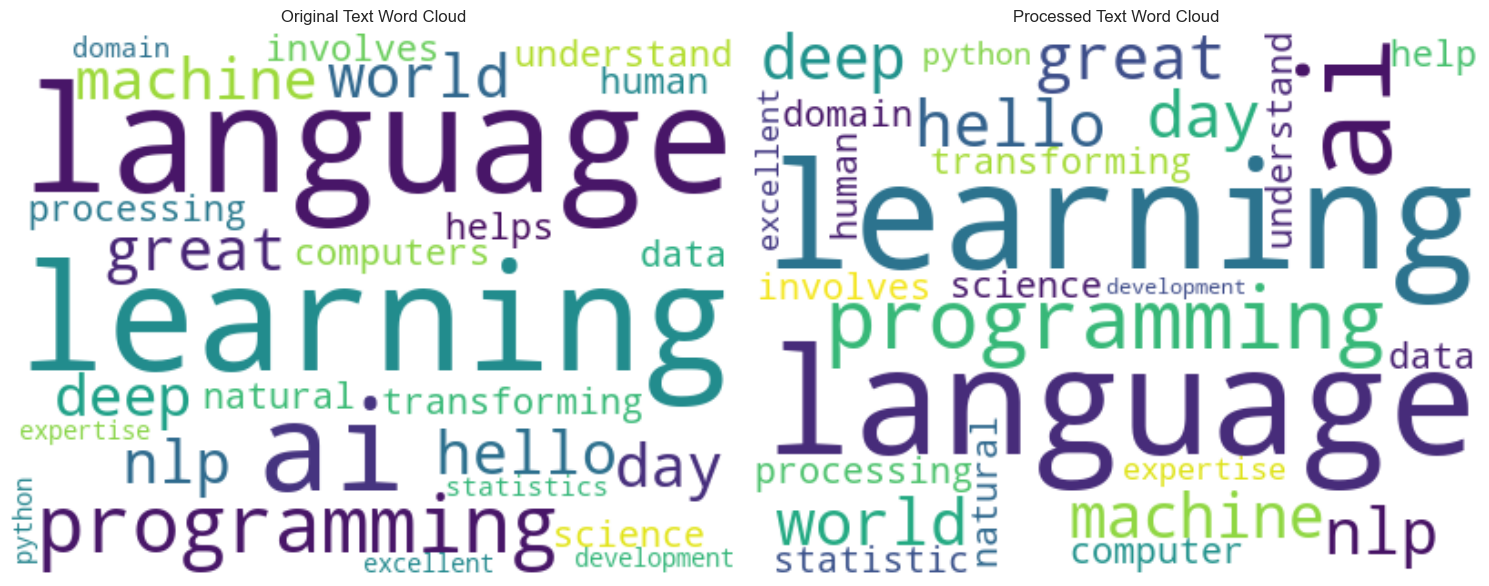

☁️ Word clouds show the most frequent words visually!


In [10]:
# Create word clouds
def create_wordcloud(words, title, ax):
    """Create word cloud visualization"""
    if words:
        text = ' '.join(words)
        wordcloud = WordCloud(width=400, height=300, 
                             background_color='white').generate(text)
        ax.imshow(wordcloud, interpolation='bilinear')
    ax.set_title(title)
    ax.axis('off')

# Create word clouds
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

create_wordcloud(original_words, 'Original Text Word Cloud', ax1)
create_wordcloud(processed_words, 'Processed Text Word Cloud', ax2)

plt.tight_layout()
plt.show()

print("☁️ Word clouds show the most frequent words visually!")

## 🔟 Performance Analysis

In [11]:
# Test preprocessing performance
import time

# Create larger test dataset
large_dataset = sample_texts * 100  # 500 texts

print(f"🚀 Performance Testing on {len(large_dataset)} texts...")

# Time the preprocessing
start_time = time.time()
processed_large = preprocessor.preprocess_batch(large_dataset)
end_time = time.time()

processing_time = end_time - start_time
texts_per_second = len(large_dataset) / processing_time

print(f"⏱️ Processing Results:")
print(f"Total time: {processing_time:.2f} seconds")
print(f"Speed: {texts_per_second:.1f} texts/second")
print(f"Average time per text: {(processing_time/len(large_dataset)*1000):.2f} ms")

# Analyze processed data
all_tokens = [token for text_tokens in processed_large for token in text_tokens]
print(f"\n📊 Large Dataset Results:")
print(f"Total processed tokens: {len(all_tokens):,}")
print(f"Unique tokens: {len(set(all_tokens)):,}")
print(f"Average tokens per text: {len(all_tokens)/len(large_dataset):.1f}")

🚀 Performance Testing on 500 texts...
⏱️ Processing Results:
Total time: 0.06 seconds
Speed: 7834.5 texts/second
Average time per text: 0.13 ms

📊 Large Dataset Results:
Total processed tokens: 3,300
Unique tokens: 27
Average tokens per text: 6.6


## 💡 Best Practices & Tips

### Key Preprocessing Guidelines:

1. **Know Your Task**: Different NLP tasks need different preprocessing
   - Sentiment Analysis: Keep some punctuation
   - Topic Modeling: Remove stopwords, lemmatize
   - NER: Preserve capitalization

2. **Validate Results**: Always check preprocessing output manually
3. **Be Consistent**: Apply same preprocessing to train/test/production data
4. **Consider Performance**: Balance thoroughness with speed
5. **Document Everything**: Keep track of preprocessing steps

### Common Mistakes to Avoid:
- Over-preprocessing (removing too much information)
- Inconsistent preprocessing between datasets
- Not handling edge cases (empty strings, special characters)
- Forgetting about computational costs for large datasets

In [12]:
# Save processed data for future notebooks
processed_df = pd.DataFrame({
    'original_text': sample_texts,
    'processed_tokens': all_processed,
    'processed_text': [' '.join(tokens) for tokens in all_processed]
})

# Save to CSV
processed_df.to_csv('processed_sample_data.csv', index=False)

print("💾 Data saved to 'processed_sample_data.csv'")
print("\n📋 Preview of saved data:")
print(processed_df[['original_text', 'processed_text']].head(3).to_string(index=False))

💾 Data saved to 'processed_sample_data.csv'

📋 Preview of saved data:
                                                         original_text                                                      processed_text
                  Hello World! This is a great day for learning NLP. 😊                                  hello world great day learning nlp
             Machine Learning and Deep Learning are transforming AI!!!                      machine learning deep learning transforming ai
Natural Language Processing helps computers understand human language. natural language processing help computer understand human language


## 🎯 Summary & Next Steps

### What We Accomplished:
✅ Built a comprehensive text preprocessing pipeline  
✅ Learned tokenization, cleaning, and normalization techniques  
✅ Compared stemming vs lemmatization  
✅ Created visualizations to understand preprocessing impact  
✅ Performance tested on larger datasets  

### Coming Up in Notebook 02: Sentiment Analysis
🔜 Loading IMDB movie reviews dataset  
🔜 Feature extraction with Bag of Words and TF-IDF  
🔜 Building sentiment classifiers  
🔜 Model evaluation and testing  

### Practice Exercises:
1. Modify the `TextPreprocessor` for different languages
2. Add custom stopwords for your domain
3. Experiment with different cleaning rules
4. Test on your own text data

**🚀 Ready for sentiment analysis? Let's continue the journey!**